In [1]:
# Importing necessary libraries
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
df = pd.read_csv("rolling_stones_spotify.csv")

In [4]:
# Display the first few rows to understand the structure
print(f"First 5 rows of the dataset:\n{df.head()}")

# Check the shape of the dataset
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Drop duplicate rows if any
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")

# Check for missing values
print(f"\nMissing values per column:\n{df.isnull().sum()}")

# Check data types and basic info
print(f"\nDataset info: {df.info()}")

# Convert release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Check for any rows with invalid dates
invalid_dates = df['release_date'].isnull().sum()
if invalid_dates > 0:
    print(f"\nFound {invalid_dates} invalid release dates. Consider reviewing them.")

# Check for outliers in numerical columns using basic statistics
print(f"\nSummary statistics for numerical features: {df.describe()}")

First 5 rows of the dataset:
   Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acoust

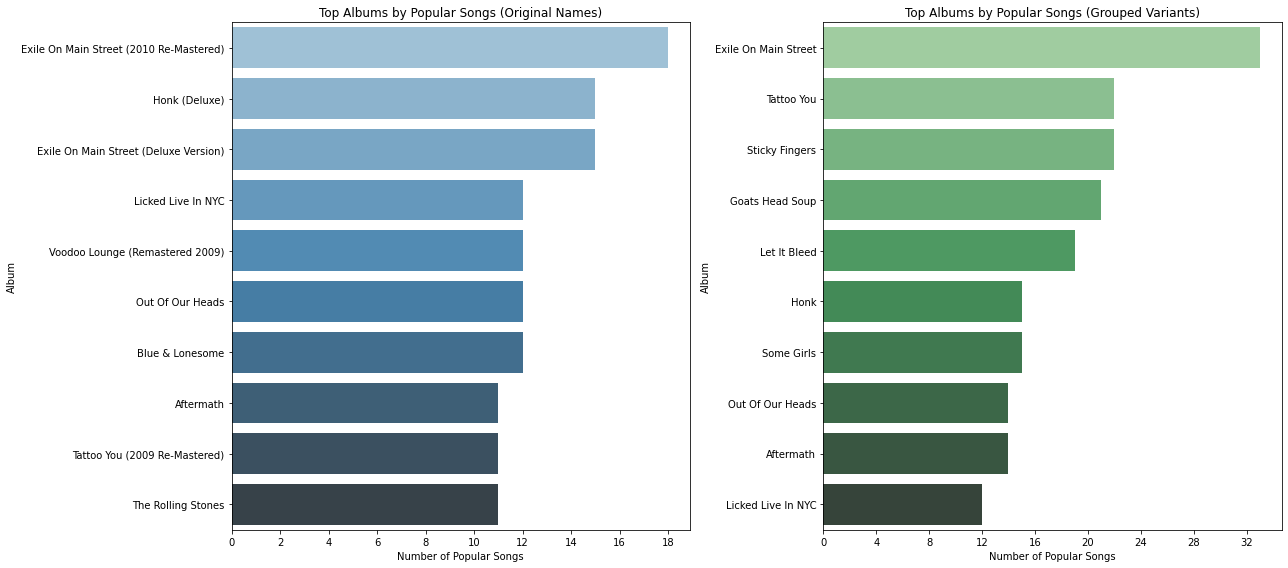

In [5]:
# -----------------------------
# Identify top 2 albums by number of popular songs
# -----------------------------

# Normalize album names by removing text in parentheses
def normalize_album_name(name):
    return re.sub(r"\s*\([^)]*\)", "", name).strip()

df['normalized_album'] = df['album'].apply(normalize_album_name)

# Define a threshold for popularity > top 25%
popularity_threshold = df['popularity'].quantile(0.75)

# Filter popular songs
popular_songs = df[df['popularity'] > popularity_threshold]

# Count popular songs per album
original_album_counts = popular_songs['album'].value_counts().head(10)

# Count popular songs per normalized album
grouped_album_counts = popular_songs['normalized_album'].value_counts().head(10)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot original album names
sns.barplot(x=original_album_counts.values, y=original_album_counts.index, palette="Blues_d", ax=axes[0])
axes[0].set_title("Top Albums by Popular Songs (Original Names)")
axes[0].set_xlabel("Number of Popular Songs")
axes[0].set_ylabel("Album")
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Plot normalized album names
sns.barplot(x=grouped_album_counts.values, y=grouped_album_counts.index, palette="Greens_d", ax=axes[1])
axes[1].set_title("Top Albums by Popular Songs (Grouped Variants)")
axes[1].set_xlabel("Number of Popular Songs")
axes[1].set_ylabel("Album")
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Adjust layout and show
plt.tight_layout()
plt.show()

## Inferences
We recommend the albums with the highest number of popular songs from the grouped album view, as this reflects the true collective popularity of each album regardless of version (Remastered, Deluxe, etc).

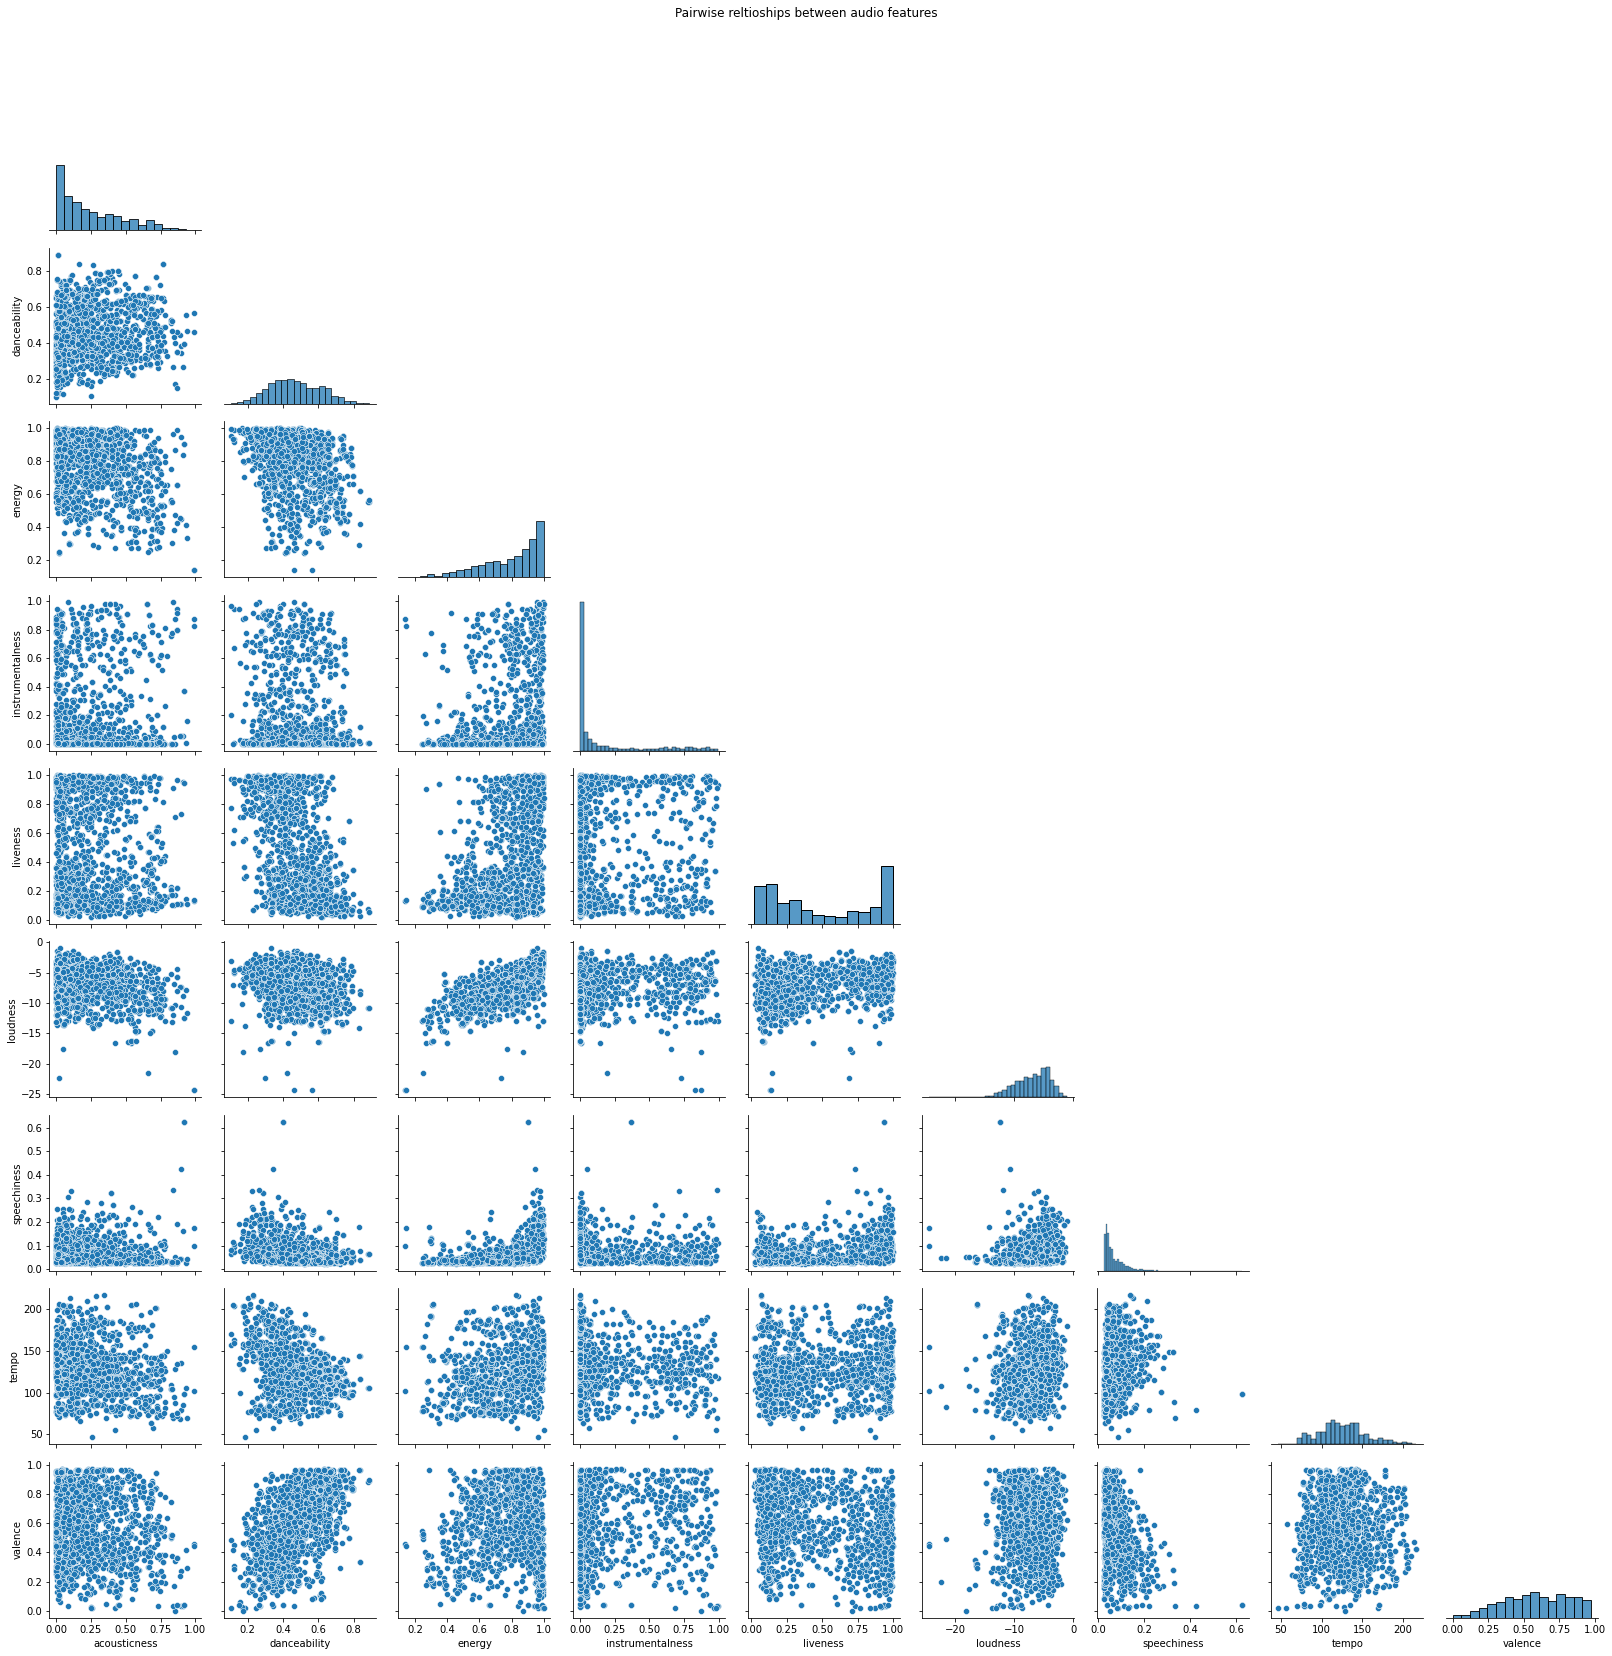

In [7]:
# -----------------------------
# Explore patterns in song features
# -----------------------------

# Select audio features for the analysis 
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Plot pairwise relationships to spot patterns
sns.pairplot(df[features], corner=True)
plt.suptitle("Pairwise reltioships between audio features", y=1.02)
plt.tight_layout()
plt.show()

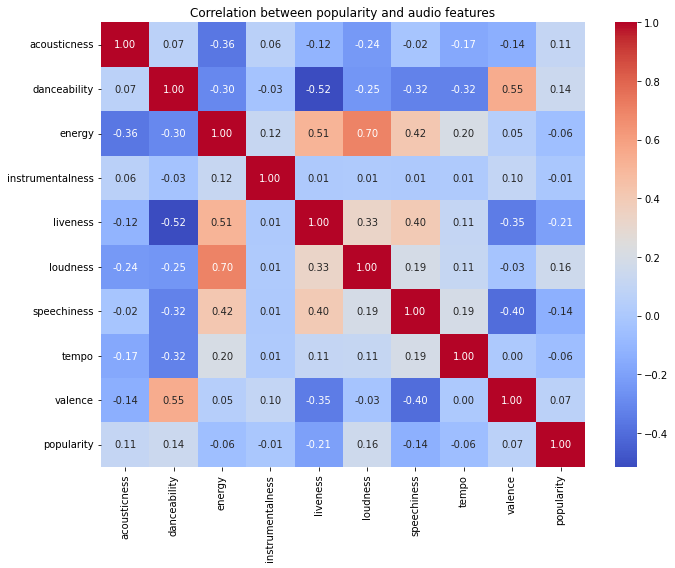

In [8]:
# Add 'popularity' to the list for correlation
features = features + ['popularity']

# Correlation Heatmap
corr_matrix = df[features].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between popularity and audio features")
plt.tight_layout()
plt.show()

## Inferences
### Features Positively Correlated with Popularity
* Valence: Songs that sound happier or more positive are slightly more popular.
* Danceability: More danceable tracks are modestly associated with higher popularity.
* Energy: Energetic songs also show a mild positive correlation.
### Features Negatively Correlated with Popularity
* Instrumentalness: Songs without vocals are generally less popular.
* Loudness: Slight negative correlation, possibly because overly loud tracks may be less pleasant or more niche.
* Acousticness: More acoustic songs are slightly less popular, possibly due to genre preferences.
### Weak or No Correlation
* Tempo, liveness, and speechiness show very weak or no clear correlation with popularity.
### Recommendations
* Consider giving more weight to features like valence, danceability, and energy when building recommendation models.
* Combining features (e.g., high energy + high valence) might be more predictive than any single feature alone.

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

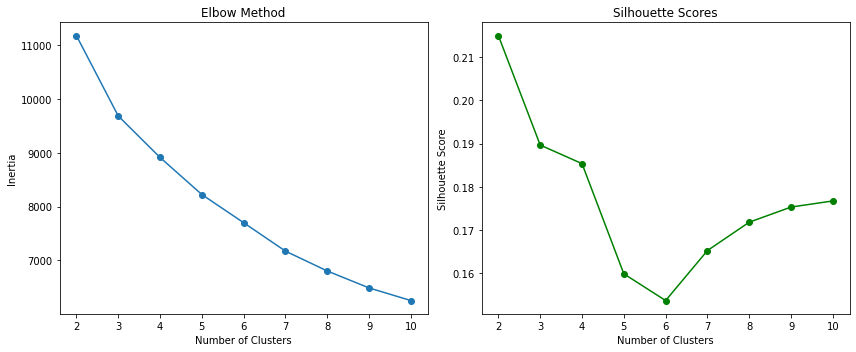

In [9]:
# Select audio features for clustering
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Standardize the features (important for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# -----------------------------
# Determine optimal number of clusters
# -----------------------------

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot Elbow and Silhouette methods
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [10]:
# -----------------------------
# Apply KMeans with optimal k = 4
# -----------------------------

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


🎯 Cluster Feature Averages:
         acousticness  danceability  energy  instrumentalness  liveness  \
cluster                                                                   
0                0.16          0.56    0.80              0.06      0.29   
1                0.19          0.36    0.93              0.11      0.83   
2                0.24          0.51    0.83              0.74      0.41   
3                0.46          0.49    0.56              0.08      0.30   

         loudness  speechiness   tempo  valence  
cluster                                          
0           -6.82         0.05  122.55     0.77  
1           -5.33         0.11  138.13     0.44  
2           -6.71         0.05  125.88     0.74  
3           -9.75         0.05  113.02     0.46  


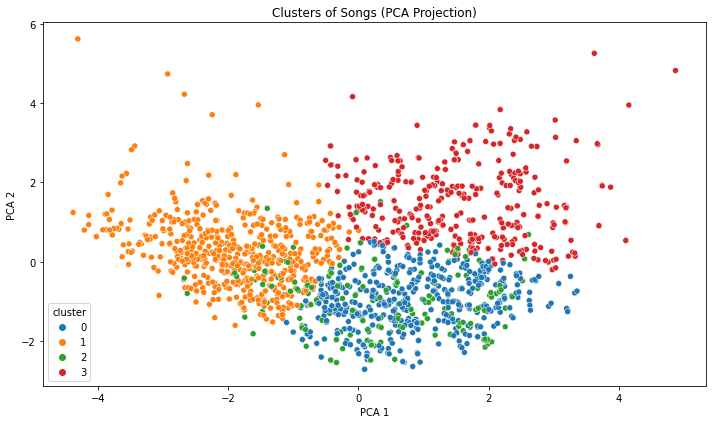

In [11]:
# -----------------------------
# Define each cluster
# -----------------------------

# Calculate average feature values per cluster
cluster_summary = df.groupby('cluster')[features].mean().round(2)
print("🎯 Cluster Feature Averages:")
print(cluster_summary)

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster', palette='tab10')
plt.title("Clusters of Songs (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()